# Processing Raw Text

In [1]:
#required packages for this chapter and on
import nltk, re, pprint
from nltk import word_tokenize

# 3.1 Accessing Text from Electronic Resources

We often want to pull text from somewhere online since the web is a large collection of text. 

The `request` function: allows you to access internet information. Paired with `.urlopen`, you can open a website and pull all the text from it. 

request.urlopen(*"URL you want to access"*)

In [2]:
from urllib import request
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
print(response)

The next step would be to put that information into a readable format for us to use.

The `.read()` and `.decode()` functions read in a file and decode the formating. We discussed previously that non Latin based languages might be a problem, as they contain special characters. `Decode` is one way to deal with them. 

*variable_name*.read().decode(*"format style"*)

In [3]:
raw = response.read().decode('utf-8-sig') ##notice this is different than the book
print(type(raw))
raw[:75]

<class 'str'>


'The Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky\r\n'

Now, we have to figure out how to process the text ourselves, as it's clearly much messier than the text we had seen in the corpora. 

**Tokenization**: the process of creating strings and punctuation from raw text. 
- We pulled `word_tokenize` from `nltk` earlier, so we can now use it to process our raw text.
- Notice how all the \r\n symbols are gone.

In [4]:
tokens = word_tokenize(raw)
print(type(tokens))
tokens[:15]

<class 'list'>


['The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Crime',
 'and',
 'Punishment',
 ',',
 'by',
 'Fyodor',
 'Dostoevsky',
 'This',
 'eBook',
 'is']

Remember, you can then convert to `nltk.Text` format to use all the functions previously mentioned using something like `text = nltk.Text(tokens)`.

One other concern is text that is extra stuff in the file. For example, in these files we see that there's some extra Project Gutenburg information. It's a bit of trial and error to get read of that information. 

The `find` and `rfind` functions are like using the find options in Word - find indicates start looking for the first instance and rfind looks for the first instance from the end. 

*variable_name*.find(*"text"*)

In [5]:
#find the start of what you want
print(raw.find("PART I"))
#find the end of what you want
print(raw.rfind("End of Project Gutenberg’s Crime"))

5335
1157812


In [6]:
#select only that information
raw = raw[5335:1157812]

Another example: HTML documents

From the book, let's pull an article about how Blondes will disappear because genetics. We will end up with raw HTML, which is full of nonsense:

In [7]:
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = request.urlopen(url).read().decode('utf8')
html[200:400]

'name="keywords" content="BBC, News, BBC News, news online, world, uk, international, foreign, british, online, service">\r\n<meta name="OriginalPublicationDate" content="2002/09/27 11:51:55">\r\n<meta nam'

We will use another package, called `bs4` or BeautifulSoup to help us clean up the HTML text.
- You would still probably need to eliminate some other unwanted information - web pages have a lot of junk on them.
- These are just a few examples, the book contains more about how to read in RSS feeds, blogs, etc. 

In [8]:
from bs4 import BeautifulSoup
raw = BeautifulSoup(html).get_text()
tokens = word_tokenize(raw)
tokens[:10]

['BBC', 'NEWS', '|', 'Health', '|', 'Blondes', "'to", 'die', 'out', 'in']

A last important example: reading your own local files:

The `open()` function: a base Python function that opens files.
The `read()` function: a based Python function that reads in a file.

*savedvar* = open(*"name of file"*)

*savedvar*.read()

In [9]:
f = open('lesson3_flipper.txt')
raw = f.read()
print(raw[:100])

body part of a fish part of a mammal that lives in water 
flipper: hand-less appendage of animal suc


Lots of things can go wrong here:
- File needs to be in the same directory as the Python file you are using
- You can link to a specific directory, be careful of \ versus /
- Formatting may be read oddly, especially new lines (return, hitting enter)

Book gives some helpful hints on how to deal with those things!

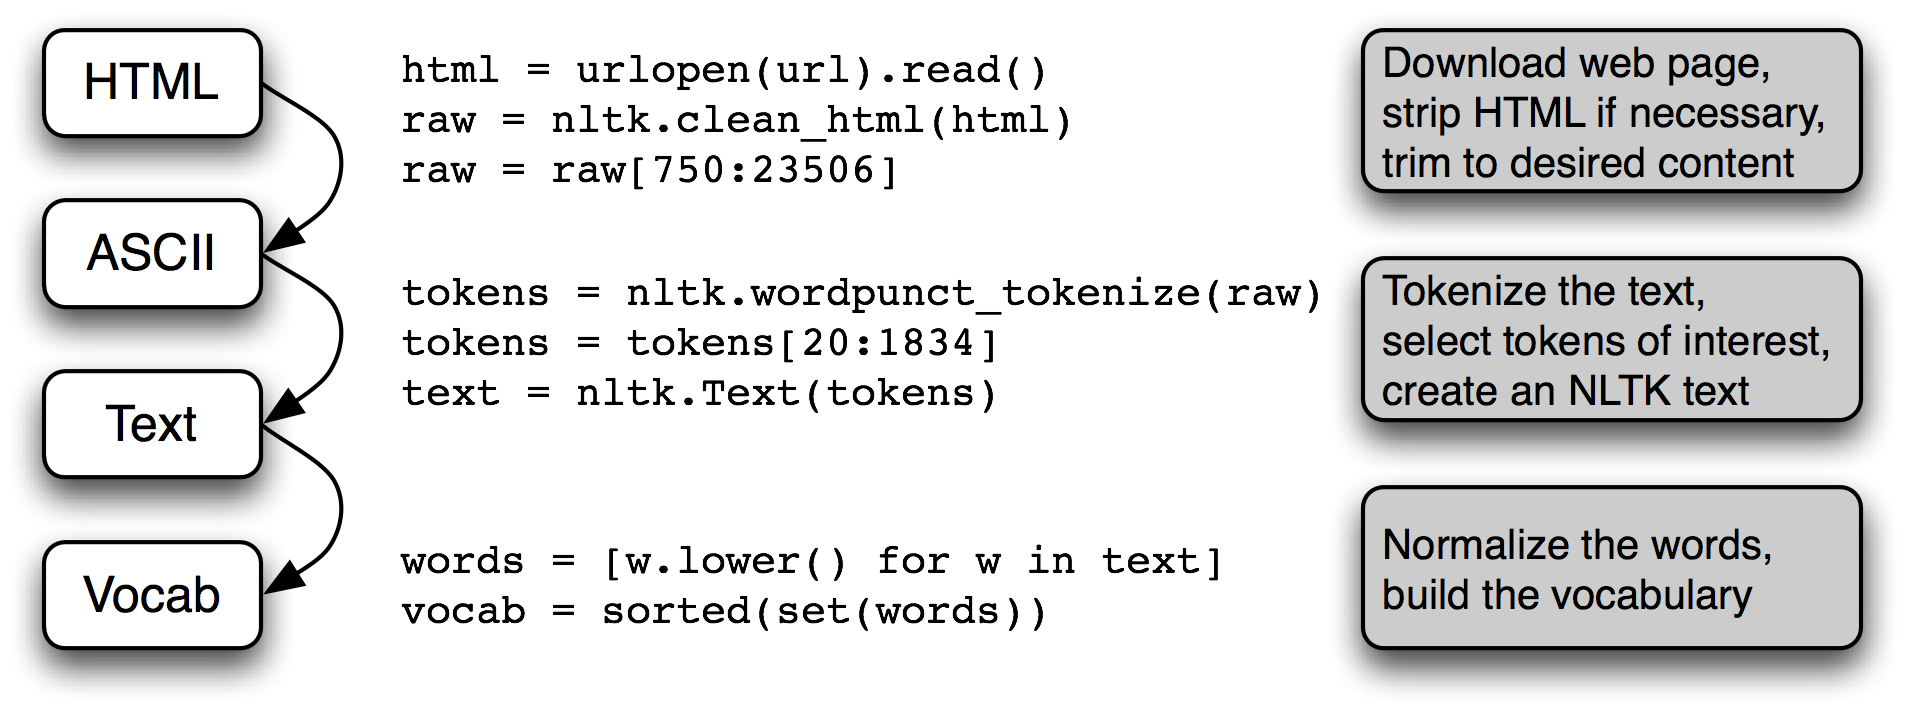

In [10]:
from IPython.display import Image
Image("lesson3-pipeline.png")
#note should say word_tokenize

# 3.2 Strings: Text Processing at the Lowest Level
Read this section of the book if you are struggling with:
- Dealing with special characters in quotes (you should escape them with `\` key)
- Text operations: adding, subtracting, slicing
- Understanding the difference between string and a list

# 3.3 Text Processing with Unicode

- Unicode is the answer to our problem of dealing with different characters. 
- Most English speaking people use in ASCII, while other areas might use extended Latin.
- Each character is assigned a number, so you can support millions of characters. 
- You would see these as `\uXXXX`, where `XXXX` is the number.
- Figuring out the text file encoding and decoding it will be important.  

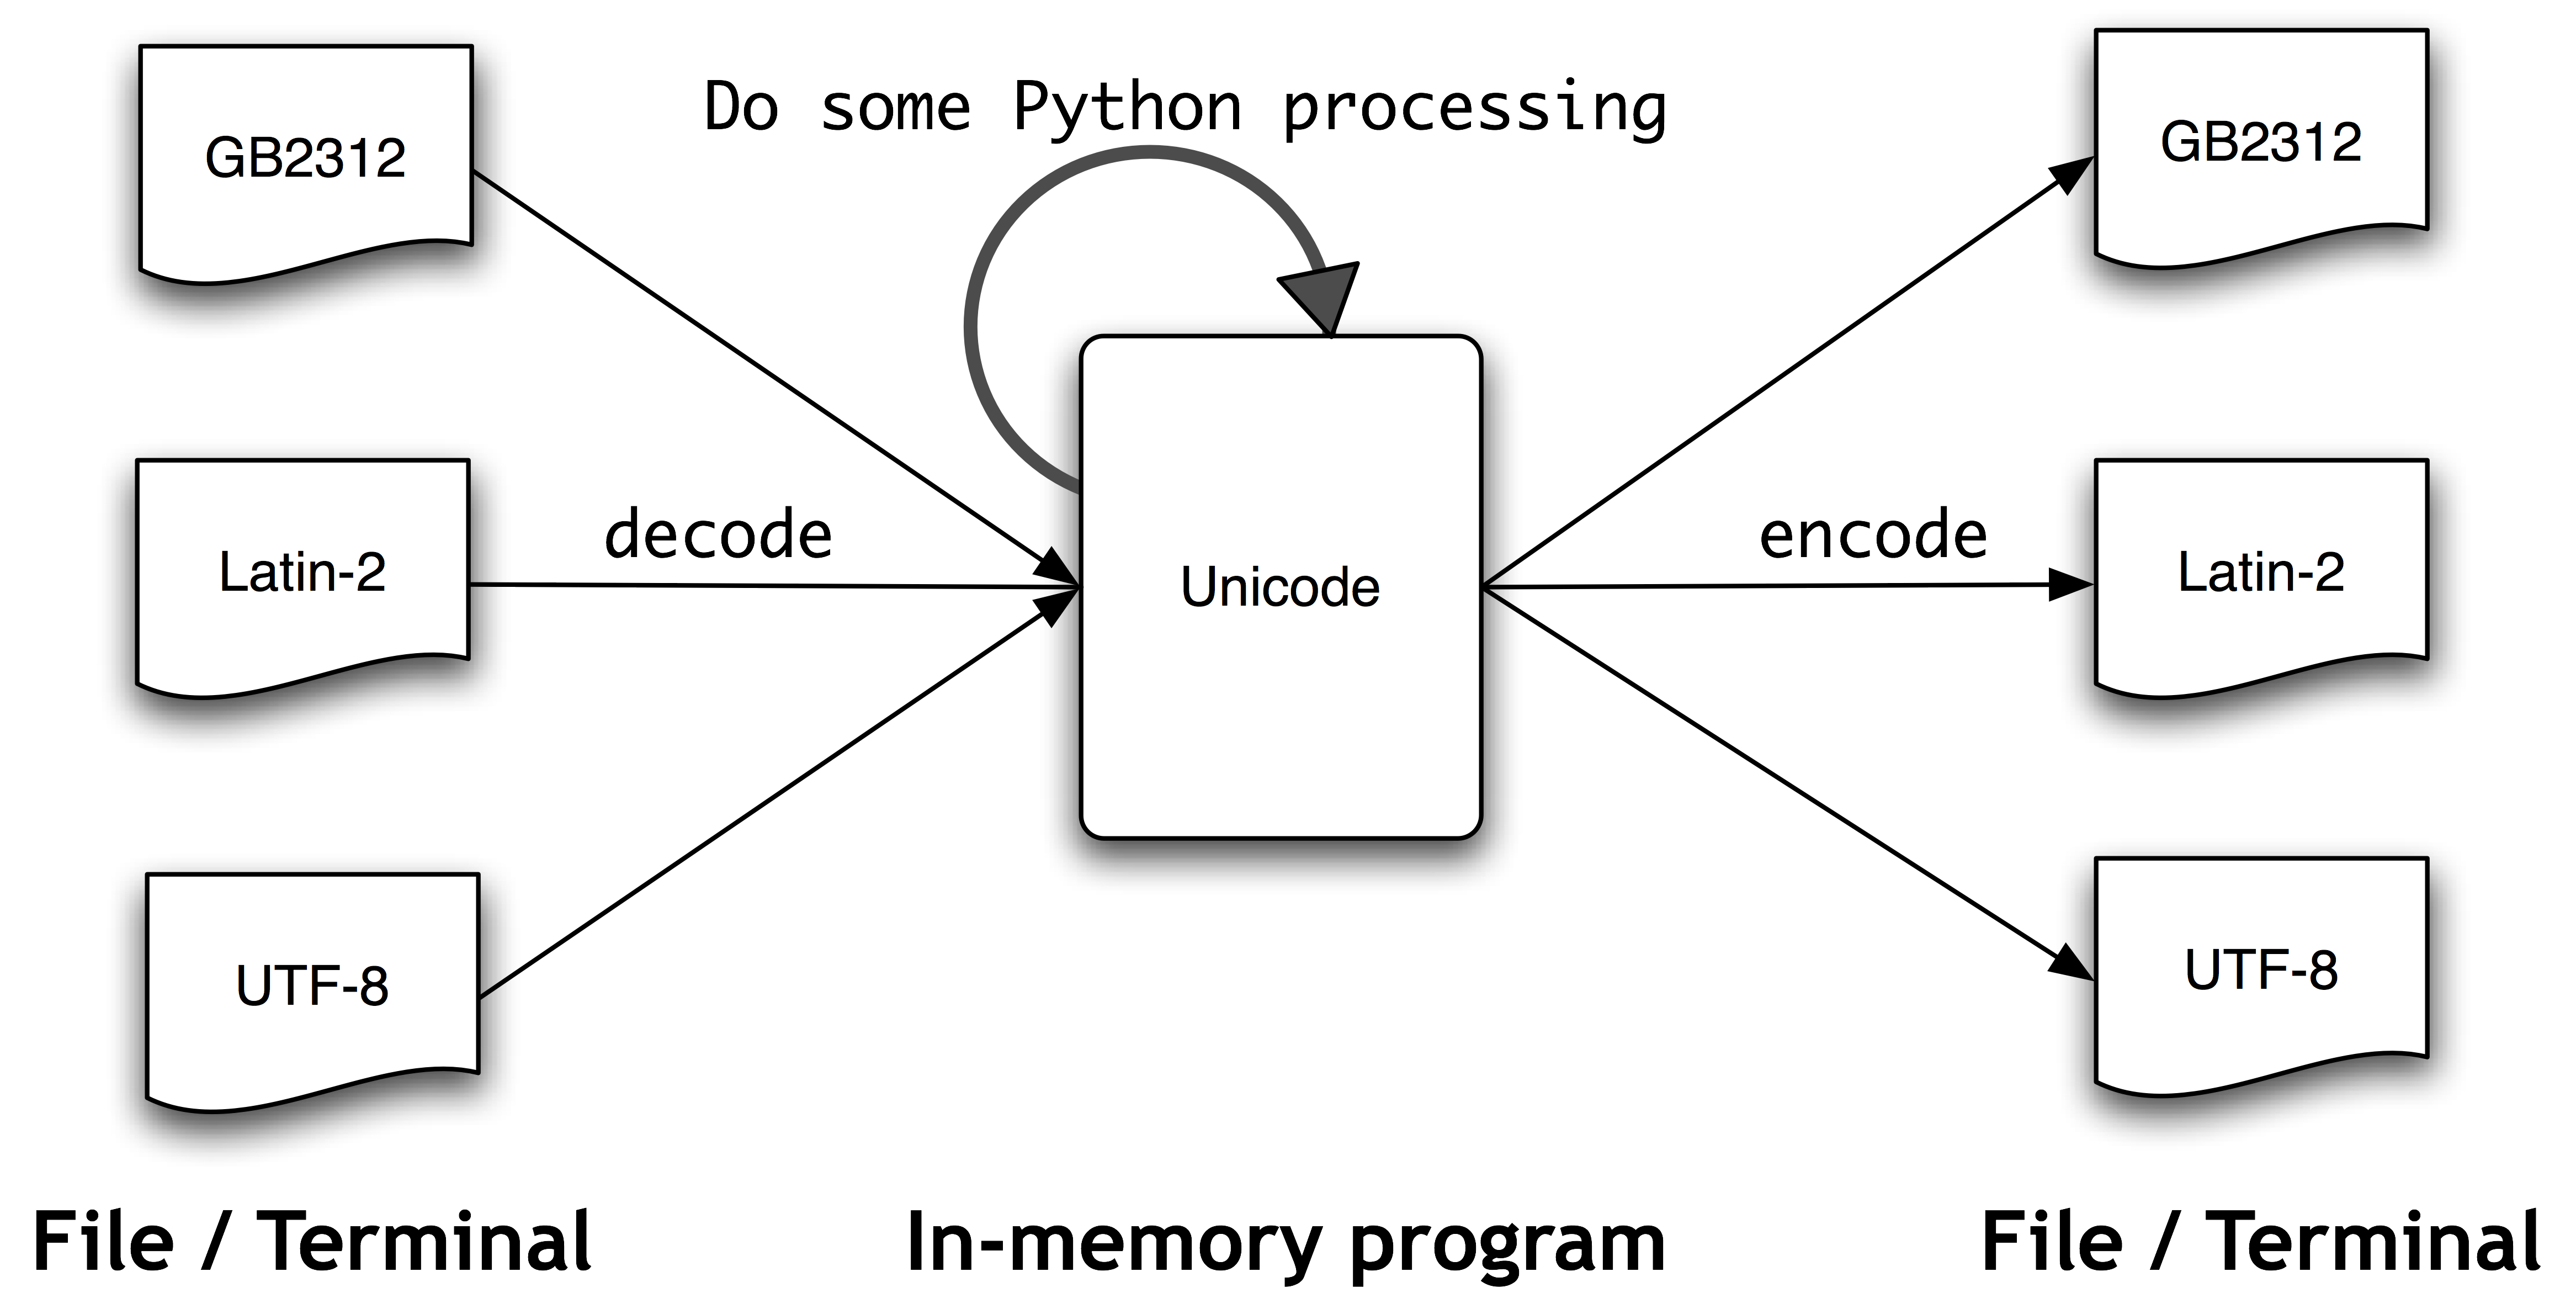

In [11]:
Image("lesson3-unicode.png")

Let's look at an example:
- First, we are using `.data.find` to figure out where the example data is stored. This function is handy if you are going to use the same file on different computers with different folders. 

In [12]:
path = nltk.data.find('corpora/unicode_samples/polish-lat2.txt')
print(path)

C:\Users\ebuchanan\AppData\Roaming\nltk_data\corpora\unicode_samples\polish-lat2.txt


Now, we are going to open the file and view it's contents:
- Use the `open` function to open the file, with the `encoding` argument (you would have to know what type it is)
- Use a loop to look at the file, line by line. 
- `strip()` takes off the line endings, thus deleting the end of line codes.

In [13]:
f = open(path, encoding='latin2')
for line in f:
    line = line.strip()
    print(line)

Pruska Biblioteka Państwowa. Jej dawne zbiory znane pod nazwą
"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez
Niemców pod koniec II wojny światowej na Dolny Śląsk, zostały
odnalezione po 1945 r. na terytorium Polski. Trafiły do Biblioteki
Jagiellońskiej w Krakowie, obejmują ponad 500 tys. zabytkowych
archiwaliów, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.


Use the following at the top of a Python document to change the encoding for the whole session:

`'# -*- coding: <coding> -*-'`

Include the right encoding where it says `<coding>` like:

`'# -*- coding: utf-8 -*-'`

# 3.4 Regular Expressions for Detecting Word Patterns

- REGEX IS EVERYTHING: pattern matching, allowing you to find specific things are you looking for
- We used `import re` earlier to import the package that does regex.
- Let's pull a wordlist from the Word Corpus in nltk to get started. 

In [14]:
#loop over w for all things in the words corpus that are english and lowercased
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]
wordlist[:10]

['a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'aardvark',
 'aardwolf',
 'aba',
 'abac',
 'abaca']

Learning regex requires understanding the way you define a pattern:
- For example $ indicates you are looking for the end of a word
- So we could find all words that end with ed in this example

The search function: using regex to find pattern matches.

re.search(*"pattern to find"*, *list_to_find_in*)

In [15]:
#loop over all words in wordlist and print out if they end in ed
[w for w in wordlist if re.search('ed$', w)][:10]

['abaissed',
 'abandoned',
 'abased',
 'abashed',
 'abatised',
 'abed',
 'aborted',
 'abridged',
 'abscessed',
 'absconded']

Wildcards are space holders, essentially denoting that *something* should exist, but not what specifically.

The `^` indicates the start of the word. So here, we are saying two symbols, then a j, two more, then a t, two more and then the end. 

You can also use `?` to denote an optional character. 

In [34]:
[w for w in wordlist if re.search('^..j..t..$', w)]

['abjectly',
 'adjuster',
 'dejected',
 'dejectly',
 'injector',
 'majestic',
 'objectee',
 'objector',
 'rejecter',
 'rejector',
 'unjilted',
 'unjolted',
 'unjustly']

What if we want to consider a range of letters? 
- How about words that start with vowels?
- Ranges are created by including the characters in `[]` meaning *any* of these.

In [47]:
[w for w in wordlist if re.search('^[aeiou]', w)][:10]

['a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'aardvark',
 'aardwolf',
 'aba',
 'abac',
 'abaca']

In [18]:
#what does the + symbol do?
chat_words = sorted(set(w for w in nltk.corpus.nps_chat.words()))
[w for w in chat_words if re.search('^m+i+n+e+$', w)]

['miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee',
 'miiiiiinnnnnnnnnneeeeeeee',
 'mine',
 'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee']

In [19]:
#what does the * symbol do?
[w for w in chat_words if re.search('^m*i*n*e*$', w)]

['',
 'e',
 'i',
 'in',
 'm',
 'me',
 'meeeeeeeeeeeee',
 'mi',
 'miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee',
 'miiiiiinnnnnnnnnneeeeeeee',
 'min',
 'mine',
 'mm',
 'mmm',
 'mmmm',
 'mmmmm',
 'mmmmmm',
 'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee',
 'mmmmmmmmmm',
 'mmmmmmmmmmmmm',
 'mmmmmmmmmmmmmm',
 'n',
 'ne']

# 3.5   Useful Applications of Regular Expressions

The `.findall()` function looks for all matches (non-overlapping).

re.findall("match", *word or list*)

In [20]:
word = 'supercalifragilisticexpialidocious'
re.findall('[aieou]', word)

['u',
 'e',
 'a',
 'i',
 'a',
 'i',
 'i',
 'i',
 'e',
 'i',
 'a',
 'i',
 'o',
 'i',
 'o',
 'u']

In [21]:
wsj = sorted(set(nltk.corpus.treebank.words()))
fd = nltk.FreqDist(vs for word in wsj
                       for vs in re.findall('[aeiou]{2,}', word))
fd.most_common(12)

[('io', 549),
 ('ea', 476),
 ('ie', 331),
 ('ou', 329),
 ('ai', 261),
 ('ia', 253),
 ('ee', 217),
 ('oo', 174),
 ('ua', 109),
 ('au', 106),
 ('ue', 105),
 ('ui', 95)]

In [22]:
#apply this idea to tabulate
#check out the letter s
rotokas_words = nltk.corpus.toolbox.words('rotokas.dic')
cvs = [cv for w in rotokas_words for cv in re.findall(r'[ptksvr][aeiou]', w)]
cfd = nltk.ConditionalFreqDist(cvs)
cfd.tabulate()

    a   e   i   o   u 
k 418 148  94 420 173 
p  83  31 105  34  51 
r 187  63  84  89  79 
s   0   0 100   2   1 
t  47   8   0 148  37 
v  93  27 105  48  49 


Another consideration for regex is that it might be a good way to **stem** or create the **lemmas** in a text. For example:
- Takes off suffixes such as: ing, ly, ed, ious, ion, es, s, ment, etc.
- Returns the word without that suffix
- `nltk` has multiple built in **stemmers** that can also handle this job for us

In [23]:
#another special character set is <> meaning any word boundary
from nltk.corpus import nps_chat
chat = nltk.Text(nps_chat.words())
chat.findall("<.*> <.*> <bro>")

you rule bro; telling you bro; u twizted bro


# 3.6 Normalizing Text

**Normalization**: converting text to all the same type for later use 

**Stemming**: taking the affixes off of a word

**Lemmatization**: making sure the word is in a known dictionary

In [48]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)
print(tokens)

['DENNIS', ':', 'Listen', ',', 'strange', 'women', 'lying', 'in', 'ponds', 'distributing', 'swords', 'is', 'no', 'basis', 'for', 'a', 'system', 'of', 'government', '.', 'Supreme', 'executive', 'power', 'derives', 'from', 'a', 'mandate', 'from', 'the', 'masses', ',', 'not', 'from', 'some', 'farcical', 'aquatic', 'ceremony', '.']


## Stemmers

- `.PorterStemmer()`: developed by Martin Porter, popular choice for English
- `.LancasterStemmer()`: developed by Chris Paice at Lancaster University

In [25]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
[porter.stem(t) for t in tokens]

['denni',
 ':',
 'listen',
 ',',
 'strang',
 'women',
 'lie',
 'in',
 'pond',
 'distribut',
 'sword',
 'is',
 'no',
 'basi',
 'for',
 'a',
 'system',
 'of',
 'govern',
 '.',
 'suprem',
 'execut',
 'power',
 'deriv',
 'from',
 'a',
 'mandat',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcic',
 'aquat',
 'ceremoni',
 '.']

In [26]:
[lancaster.stem(t) for t in tokens]

['den',
 ':',
 'list',
 ',',
 'strange',
 'wom',
 'lying',
 'in',
 'pond',
 'distribut',
 'sword',
 'is',
 'no',
 'bas',
 'for',
 'a',
 'system',
 'of',
 'govern',
 '.',
 'suprem',
 'execut',
 'pow',
 'der',
 'from',
 'a',
 'mand',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'som',
 'farc',
 'aqu',
 'ceremony',
 '.']

## Lemmatization

We can use the WordNet option, but only works if it's in the dictionary - does handle some odd plurals (like women) but not odd verbs like lying.

In [27]:
wnl = nltk.WordNetLemmatizer()
[wnl.lemmatize(t) for t in tokens]

['DENNIS',
 ':',
 'Listen',
 ',',
 'strange',
 'woman',
 'lying',
 'in',
 'pond',
 'distributing',
 'sword',
 'is',
 'no',
 'basis',
 'for',
 'a',
 'system',
 'of',
 'government',
 '.',
 'Supreme',
 'executive',
 'power',
 'derives',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony',
 '.']

# 3.7 Tokenizing Text

- **Tokenizing**: creating language pieces, often words, split on whitespace
- You could do this with regular expressions
- But there are options already built into `nltk`

The `.regexp_tokenize()` function: allows you to use regex break apart into tokens.

In [28]:
text = 'That U.S.A. poster-print costs $12.40...'
nltk.regexp_tokenize(text, "\w+\s")

['That ', 'print ', 'costs ']

# 3.8 Segmentation

The `.sent_tokenize()` function: enter some text to break apart into sentences. Also consider the issues with end of line codes from text documents. 

In [52]:
text = nltk.corpus.gutenberg.raw('carroll-alice.txt')
sents = nltk.sent_tokenize(text)
pprint.pprint(sents[3:4])

['There was nothing so VERY remarkable in that; nor did Alice think it so\n'
 "VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!"]
